# Перцептрон для восприятия цифр
__Суммарное количество баллов: 10__

В этом задании вам предстоит реализовать классический перцептрон, немного улучшить его, и протестировать результат на классической задаче определния цифр по изображениям.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
import copy

### Задание 1 (3 балла)
Для начала реализуем простой перцептрон.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [150]:
class Perceptron:
    iterations = None
    w = None
    ys = None
    def __init__(self, iterations=100):
        self.iterations = iterations
    
    def fit(self, X, y):
        self.ys = np.unique(y)
        self.w = [0 for _ in range(X.shape[1] + 1)]
        sum = 0 # Инициализируем w[0] по-умному для быстрой сходимости
        for feature in range(len(X[0])): # Считаем предсказанный класс
                    sum+=X[0][feature]
        self.w[0] = -sum
        for _ in range(self.iterations):
            w = self.w
            for i in range(len(X)):
                sum = w[0]
                for feature in range(len(X[i])): # Считаем предсказанный класс
                    sum+=w[feature+1]*X[i][feature]
                
                res = self.ys[0] if sum >= 0 else self.ys[1]
                if res != y[i]:
#                     print(y[i])
                    a = 1 if y[i] == self.ys[0] else -1
                    for weight in range(len(w)):
                        if weight == 0:
                            self.w[weight]+=a
                        else:
                            self.w[weight]+=a*X[i][weight-1]
#                     print(self.w)
        
                
            
    def predict(self, X):
        ress=[]
        for el in X:
            sum = self.w[0]
            for feature in range(len(el)):
                sum+=self.w[feature+1]*el[feature]

            res = self.ys[0] if sum >= 0 else self.ys[1]
            ress.append(res)
        return ress
        

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

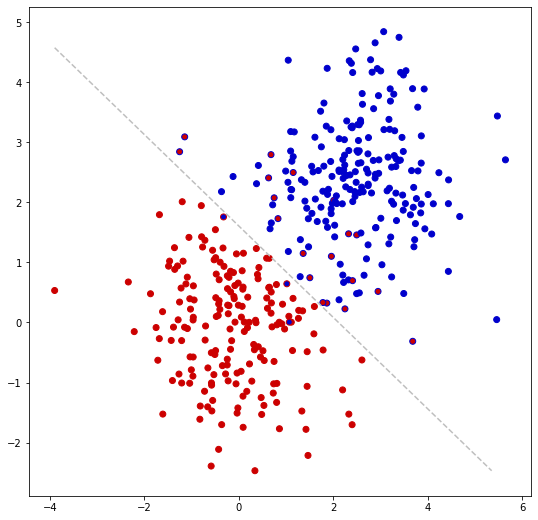

In [159]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron()
# true_labels = [(-1 if true_labels[i] == 0 else 1) for i in range(len(true_labels))]
c.fit(X, true_labels)

visualize(X, true_labels, np.array(c.predict(X)), c.w)

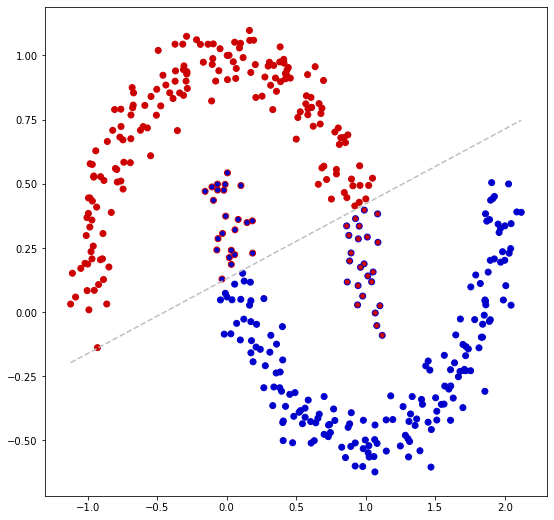

In [174]:
X, true_labels = make_moons(400, noise=0.075)
c = Perceptron()
# true_labels = [(-1 if true_labels[i] == 0 else 1) for i in range(len(true_labels))]
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 2 (2 балл)
Проблема обычной реализации перцептрона в том, что закончить его обучение мы можем с неоптимальными весами, т.к. точность разбиения в зависимости от числа итераций не растет монотонно. Чтобы этого избежать, мы можем оставлять в конце веса той итерации, на которой мы лучше всего разбивали множество `X`.

Реализуем перцептрон с карманом.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. В конце обучения оставляет лучшие веса. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [169]:
class PerceptronBest:
    iterations = None
    w = None
    ys = None
    def __init__(self, iterations=100):
        self.iterations = iterations
    
    def fit(self, X, y):
        self.ys = np.unique(y)
        self.w = [0 for _ in range(X.shape[1] + 1)]
        sum = 0 # Инициализируем w[0] по-умному для быстрой сходимости
        for feature in range(len(X[0])): 
            sum+=X[0][feature]
        self.w[0] = -sum
        best_errors = len(X)
        best_w = self.w
        for _ in range(self.iterations):
            w = self.w # Фиксируем w
            errors = 0
            for i in range(len(X)):
                sum = w[0]
                for feature in range(len(X[i])): # Вычисляем значение
                    sum+=w[feature+1]*X[i][feature]
                
                res = self.ys[0] if sum >= 0 else self.ys[1]
                if res != y[i]: # Обновляем веса
                    a = 1 if y[i] == self.ys[0] else -1
                    errors+=1
                    for weight in range(len(w)):
                        if weight == 0:
                            self.w[weight]+=a
                        else:
                            self.w[weight]+=a*X[i][weight-1]
            if errors < best_errors: # Считаем лучшим вариантом тот, где меньше всего несовпадений
                best_errors = errors
                best_w = w
#                 print(best_w)
        self.w = best_w
        
                
            
    def predict(self, X):
        ress=[]
        for el in X:
            sum = self.w[0]
            for feature in range(len(el)):
                sum+=self.w[feature+1]*el[feature]

            res = self.ys[0] if sum >= 0 else self.ys[1]
            ress.append(res)
#         print(ress)
        return ress
        

In [170]:
def visualize(X, labels_true, labels_pred, w):
    unique_labels = np.unique(labels_true)
    unique_colors = dict([(l, c) for l, c in zip(unique_labels, [[0.8, 0., 0.], [0., 0., 0.8]])])
    plt.figure(figsize=(9, 9))

    if w[1] == 0:
        plt.plot([X[:, 0].min(), X[:, 0].max()], w[0] / w[2])
    elif w[2] == 0:
        plt.plot(w[0] / w[1], [X[:, 1].min(), X[:, 1].max()])  
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        pts = [[mins[0], -mins[0] * w[1] / w[2] - w[0] / w[2]],
               [maxs[0], -maxs[0] * w[1] / w[2] - w[0] / w[2]],
               [-mins[1] * w[2] / w[1] - w[0] / w[1], mins[1]],
               [-maxs[1] * w[2] / w[1] - w[0] / w[1], maxs[1]]]
        pts = [(x, y) for x, y in pts if mins[0] <= x <= maxs[0] and mins[1] <= y <= maxs[1]]
        x, y = list(zip(*pts))
        plt.plot(x, y, c=(0.75, 0.75, 0.75), linestyle="--")
    
    colors_inner = [unique_colors[l] for l in labels_true]
    colors_outer = [unique_colors[l] for l in labels_pred]
    plt.scatter(X[:, 0], X[:, 1], c=colors_inner, edgecolors=colors_outer)
    plt.show()

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

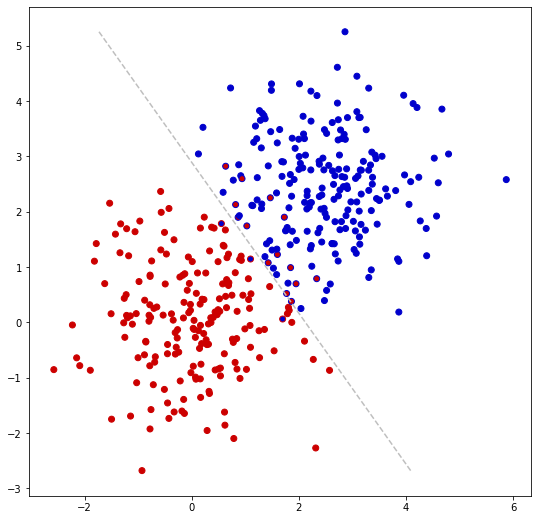

In [171]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronBest()
# true_labels = [(-1 if true_labels[i] == 0 else 1) for i in range(len(true_labels))]
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

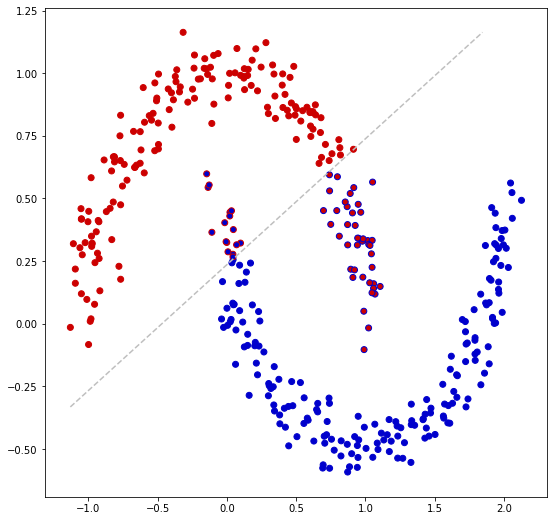

In [173]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronBest()
# true_labels = [(-1 if true_labels[i] == 0 else 1) for i in range(len(true_labels))]
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 3 (1 балл)
Реализуйте метод `transform_images(images)`, который преобразует изображения в двумерные векторы. Значение компонент векторов придумайте сами и напишите в виде комментария к методу.

In [133]:
def transform_images(images):
#     print(images)
    res = []
    for image in images:
        density = np.mean(image)
        x_den = image.sum(axis=0)
        res.append([max(x_den), np.mean(x_den)])
    res = np.array(res)
    return res

def get_digits(y0=1, y1=5):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    mask = np.logical_or(labels == y0, labels == y1)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = transform_images(images)
    return X, labels
# print(get_digits())

### Задание 4 (4 балла)
Теперь посмотрим на точность обычного перцептрона и перцептрона выбором лучшей итерации. Для тестирования будем использовать цифры 1 и 5. Необходимо использовать реализованное выше преобразование, т.е. только векторы из 2х признаков. 

Точность хотя бы одного из классификаторов на тестовой выборке должна быть больше 80%

In [151]:
X, y = get_digits()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
# print(X_train, y_train)

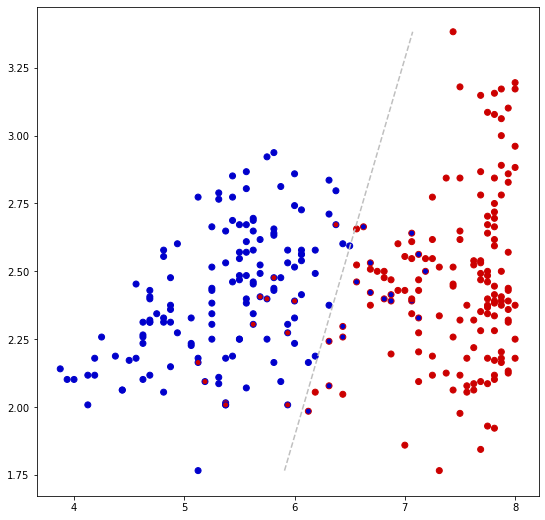

Accuracy: 0.863013698630137


In [152]:
c = Perceptron(iterations=10000)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

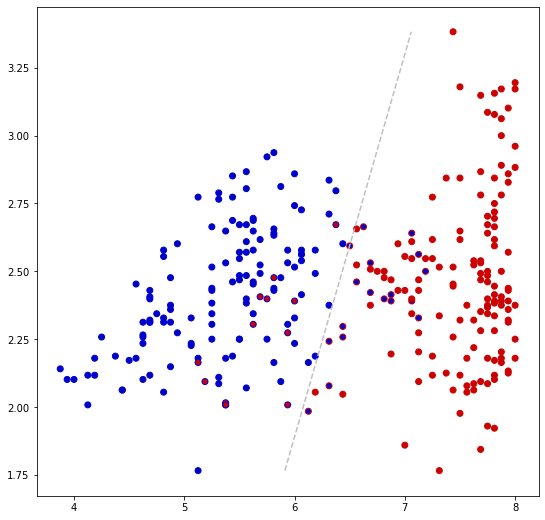

Accuracy: 0.863013698630137


In [149]:
c = PerceptronBest(iterations=20000)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

А теперь посчитаем среднюю точность по всем возможным парам цифр

In [175]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = Perceptron(iterations=2000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.6292929401200028


In [179]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = PerceptronBest(iterations=1000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.6314321749880306
